In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_parquet('data/yellow_tripdata_2024-01.parquet')

In [3]:
## data exploratory
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


In [4]:
data.sample(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
2688021,1,2024-01-30 17:02:15,2024-01-30 17:21:35,1.0,2.90,1.0,N,230,236,1,19.1,5.0,0.5,2.00,0.00,1.0,27.60,2.5,0.0
1164170,2,2024-01-14 11:02:27,2024-01-14 11:20:11,4.0,10.91,1.0,N,162,138,1,41.5,5.0,0.5,14.36,6.94,1.0,71.80,2.5,0.0
2807750,2,2024-01-31 20:36:32,2024-01-31 20:47:19,1.0,3.99,1.0,N,262,107,1,18.4,1.0,0.5,2.00,0.00,1.0,25.40,2.5,0.0
2211136,1,2024-01-25 17:56:56,2024-01-25 18:01:11,1.0,0.80,1.0,N,231,249,1,5.8,5.0,0.5,2.45,0.00,1.0,14.75,2.5,0.0
2295559,2,2024-01-26 14:27:41,2024-01-26 14:30:41,1.0,0.59,1.0,N,170,107,1,5.1,0.0,0.5,1.82,0.00,1.0,10.92,2.5,0.0


In [5]:
data.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
2964619,2,2024-01-31 23:45:59,2024-01-31 23:54:36,NaN,3.18,NaN,None,107,263,0,15.77,0.00,0.5,2.00,0.00,1.0,21.77,NaN,NaN
2964620,1,2024-01-31 23:13:07,2024-01-31 23:27:52,NaN,4.00,NaN,None,114,236,0,18.40,1.00,0.5,2.34,0.00,1.0,25.74,NaN,NaN
2964621,2,2024-01-31 23:19:00,2024-01-31 23:38:00,NaN,3.33,NaN,None,211,25,0,19.97,0.00,0.5,0.00,0.00,1.0,23.97,NaN,NaN
2964622,2,2024-01-31 23:07:23,2024-01-31 23:25:14,NaN,3.06,NaN,None,107,13,0,23.88,0.00,0.5,5.58,0.00,1.0,33.46,NaN,NaN
2964623,1,2024-01-31 23:58:25,2024-02-01 00:13:30,NaN,8.10,NaN,None,138,75,0,32.40,7.75,0.5,7.29,6.94,1.0,55.88,NaN,NaN


In [6]:
## Checking the names of each columns
data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [7]:
## value counts of each elements in columns
for col in data.columns:
    print(f"Column: {col}")
    print("-------------")
    print(data[col].value_counts())
    print("\n")


Column: VendorID
-------------
VendorID
2    2234632
1     729732
6        260
Name: count, dtype: int64


Column: tpep_pickup_datetime
-------------
tpep_pickup_datetime
2024-01-17 16:25:48    11
2024-01-17 18:17:00    11
2024-01-06 22:09:45    11
2024-01-12 15:28:25    11
2024-01-26 22:04:27    11
                       ..
2024-01-31 22:09:02     1
2024-01-31 22:35:20     1
2024-01-31 22:17:22     1
2024-01-31 23:03:00     1
2024-01-31 23:10:13     1
Name: count, Length: 1575706, dtype: int64


Column: tpep_dropoff_datetime
-------------
tpep_dropoff_datetime
2024-01-05 00:00:00    19
2024-01-27 00:00:00    16
2024-01-09 00:00:00    16
2024-01-29 00:00:00    16
2024-01-21 00:00:00    16
                       ..
2024-01-31 23:35:58     1
2024-01-31 23:32:41     1
2024-02-01 00:04:15     1
2024-01-31 23:32:33     1
2024-01-31 23:23:06     1
Name: count, Length: 1574780, dtype: int64


Column: passenger_count
-------------
passenger_count
1.0    2188739
2.0     405103
3.0      91262
4.

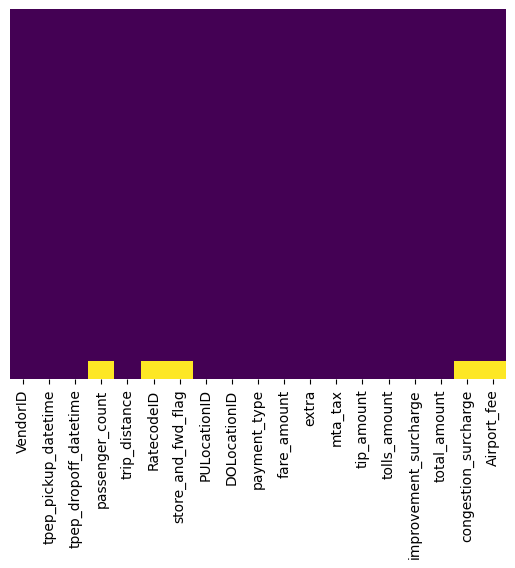

In [8]:
## checking the null values
sns.heatmap(data.isna(),cbar=False,yticklabels=False,cmap='viridis')
plt.show()

In [9]:
data.isna().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          140162
trip_distance                 0
RatecodeID               140162
store_and_fwd_flag       140162
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     140162
Airport_fee              140162
dtype: int64

In [10]:
## filling the missing values
data['passenger_count'] = data['passenger_count'].fillna(data['passenger_count'].mode()[0])
data['RatecodeID'] = data['RatecodeID'].fillna(data['RatecodeID'].mode()[0])
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].fillna(data['store_and_fwd_flag'].mode()[0])
data['congestion_surcharge'] = data['congestion_surcharge'].fillna(data['congestion_surcharge'].median())
data['Airport_fee'] = data['Airport_fee'].fillna(data['Airport_fee'].median())

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
dtype: int64

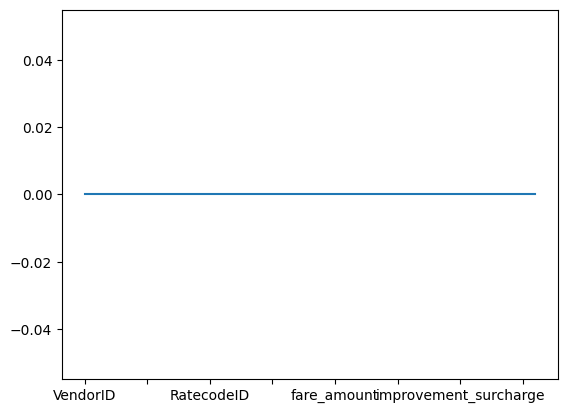

In [11]:
data.isna().sum().plot()
data.isna().sum()

## no null values left

In [12]:
## handling the drop and pickup columns
data['trip_duration_minutes'] = ((data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']).dt.total_seconds() / 60).abs()


In [13]:
# # Extract components from pickup
data['pickup_year'] = data['tpep_pickup_datetime'].dt.year
data['pickup_month'] = data['tpep_pickup_datetime'].dt.month
data['pickup_day'] = data['tpep_pickup_datetime'].dt.day
data['pickup_hour'] = data['tpep_pickup_datetime'].dt.hour
data['pickup_minute'] = data['tpep_pickup_datetime'].dt.minute
data['pickup_second'] = data['tpep_pickup_datetime'].dt.second

In [14]:
# dropping the pickup and dropoff columns
data = data.drop(['tpep_pickup_datetime','tpep_dropoff_datetime'],axis=1)

In [15]:
data[data['trip_distance'] > 1000]


,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,total_amount,congestion_surcharge,Airport_fee,trip_duration_minutes,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second
166339,2,1.0,10879.28,2.0,N,132,224,1,70.00,0.0,...,98.88,2.5,1.75,44.633333,2024,1,3,11,2,57
1201773,2,1.0,1715.22,4.0,N,132,162,1,70.00,0.0,...,98.88,2.5,1.75,42.383333,2024,1,14,17,22,52
1433602,2,1.0,15400.32,4.0,N,163,24,1,28.90,0.0,...,39.48,2.5,0.00,32.133333,2024,1,17,14,50,40
2833541,2,1.0,28339.60,1.0,N,244,166,0,22.82,0.0,...,29.18,2.5,0.00,12.000000,2024,1,1,15,41,0
2843369,2,1.0,59282.45,1.0,N,74,47,0,32.02,0.0,...,33.52,2.5,0.00,31.000000,2024,1,5,15,46,0
2854947,2,1.0,59076.43,1.0,N,141,162,0,13.82,0.0,...,23.17,2.5,0.00,4.000000,2024,1,9,7,13,0
2855208,2,1.0,33916.10,1.0,N,211,162,0,21.94,0.0,...,26.94,2.5,0.00,16.000000,2024,1,9,8,16,0
2862793,2,1.0,15015.12,1.0,N,239,237,0,13.82,0.0,...,21.38,2.5,0.00,12.000000,2024,1,10,7,11,0
2865355,2,1.0,33934.01,1.0,N,238,142,0,13.82,0.0,...,19.60,2.5,0.00,7.000000,2024,1,11,7,41,0
2868605,2,1.0,51619.36,1.0,N,238,186,0,16.17,0.0,...,24.20,2.5,0.00,10.000000,2024,1,12,5,16,0


In [16]:
data[data['trip_duration_minutes']>1000]

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,total_amount,congestion_surcharge,Airport_fee,trip_duration_minutes,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second
3992,2,5.0,2.75,1.0,N,43,137,1,17.70,1.0,...,28.38,2.5,0.0,1435.133333,2024,1,1,0,39,11
4946,2,1.0,4.90,1.0,N,79,263,1,33.10,1.0,...,49.53,2.5,0.0,1432.816667,2024,1,1,0,51,24
5230,2,1.0,1.18,1.0,N,79,137,2,7.20,1.0,...,12.20,2.5,0.0,1433.750000,2024,1,1,0,40,40
5428,2,5.0,1.38,1.0,N,79,144,1,12.10,1.0,...,17.10,2.5,0.0,1436.750000,2024,1,1,0,53,11
5433,2,6.0,3.33,1.0,N,163,79,1,20.50,1.0,...,25.50,2.5,0.0,1300.883333,2024,1,1,0,21,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2813146,2,1.0,4.37,1.0,N,239,116,1,22.60,1.0,...,30.36,2.5,0.0,1425.466667,2024,1,31,21,36,44
2817188,2,1.0,0.86,1.0,N,230,186,2,5.80,1.0,...,10.80,2.5,0.0,1394.083333,2024,1,31,22,23,17
2820531,2,5.0,1.94,1.0,N,170,246,2,14.20,1.0,...,19.20,2.5,0.0,1433.183333,2024,1,31,22,11,23
2823413,2,2.0,32.31,5.0,N,132,265,1,180.00,0.0,...,201.82,0.0,0.0,1097.550000,2024,1,31,23,27,59


In [17]:
# # # Filter out unrealistic trips
data = data[
    (data['trip_distance'] > 0) & 
    (data['trip_distance'] < 100) &    
    (data['trip_duration_minutes'] > 0) & 
    (data['trip_duration_minutes'] < 180)   
]


In [18]:
len(data)

2902192

In [19]:
## checking the columns containing negative values
def negative_col(data):
    negative_cols = []
    
    for col in data.columns:
        if data[col].dtype != 'object':      # only check numeric columns
            if (data[col] < 0).any():        # check if any negative exists
                negative_cols.append(col)
    
    return negative_cols

# usage
print("Columns with negative values:", negative_col(data))


Columns with negative values: ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']


In [20]:
data['fare_amount'] = data['fare_amount'].abs()
data['extra'] = data['extra'].abs()
data['mta_tax'] = data['mta_tax'].abs()
data['tip_amount'] = data['tip_amount'].abs()
data['tolls_amount'] = data['tolls_amount'].abs()
data['improvement_surcharge'] = data['improvement_surcharge'].abs()
data['total_amount'] = data['total_amount'].abs()
data['congestion_surcharge'] = data['congestion_surcharge'].abs()
data['Airport_fee'] = data['Airport_fee'].abs()

### visulasation


1.Univariate Analysis

In [21]:
data.head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,total_amount,congestion_surcharge,Airport_fee,trip_duration_minutes,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second
0,2,1.0,1.72,1.0,N,186,79,2,17.7,1.0,...,22.70,2.5,0.0,19.800000,2024,1,1,0,57,55
1,1,1.0,1.80,1.0,N,140,236,1,10.0,3.5,...,18.75,2.5,0.0,6.600000,2024,1,1,0,3,0
2,1,1.0,4.70,1.0,N,236,79,1,23.3,3.5,...,31.30,2.5,0.0,17.916667,2024,1,1,0,17,6
3,1,1.0,1.40,1.0,N,79,211,1,10.0,3.5,...,17.00,2.5,0.0,8.300000,2024,1,1,0,36,38
4,1,1.0,0.80,1.0,N,211,148,1,7.9,3.5,...,16.10,2.5,0.0,6.100000,2024,1,1,0,46,51


In [22]:
payment_counts = data['payment_type'].value_counts()

payment_index = payment_counts.index       
payment_value = payment_counts.values  



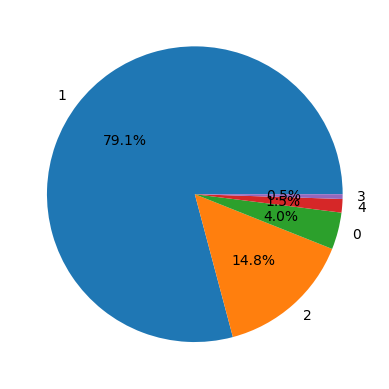

In [23]:
plt.pie(x=payment_value,labels=payment_index,autopct='%1.1f%%')
plt.show()

## Values:

1  Credit card
2  Cash
3  No charge
4  Dispute
5  Unknown
6  Voided trip

## observation:- most of the payment is done by credit card i.e 79.1%

In [24]:
## Trip vs 

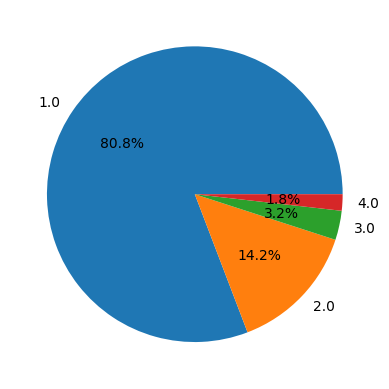

In [25]:
pass_index = data.passenger_count.value_counts().index
pass_value = data.passenger_count.value_counts().values

plt.pie(x=pass_value[:4],labels=pass_index[:4],autopct='%1.1f%%')
plt.show()

## observation:-
1. Single passenger trips dominate → Around 80.8% of all trips have just 1 passenger.

2. Two-passenger trips are the second most common, making up about 14.2%.

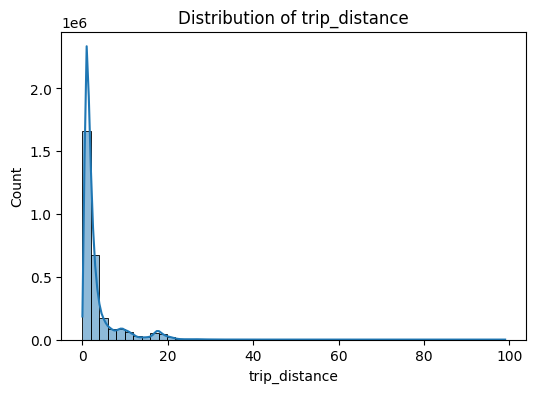

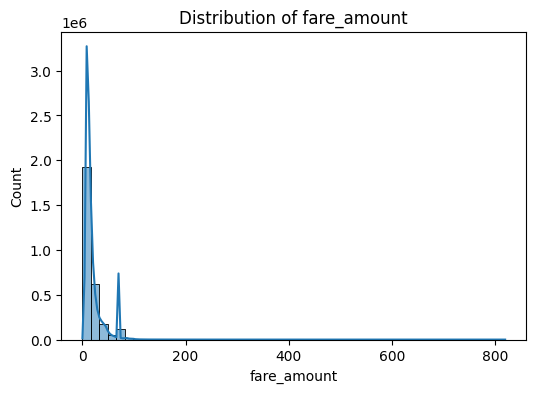

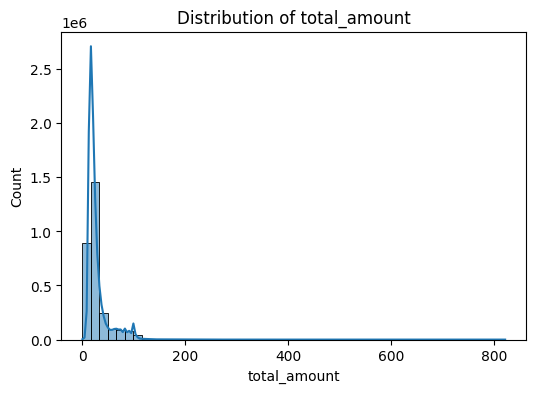

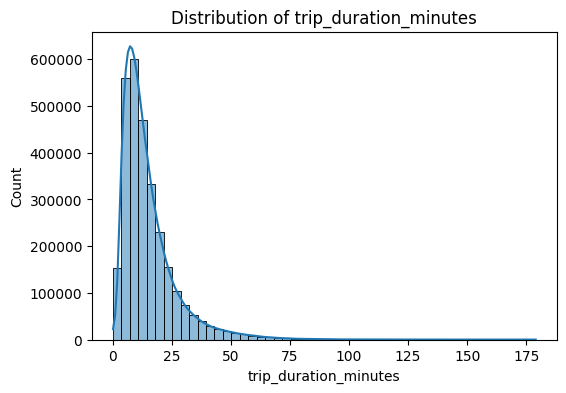

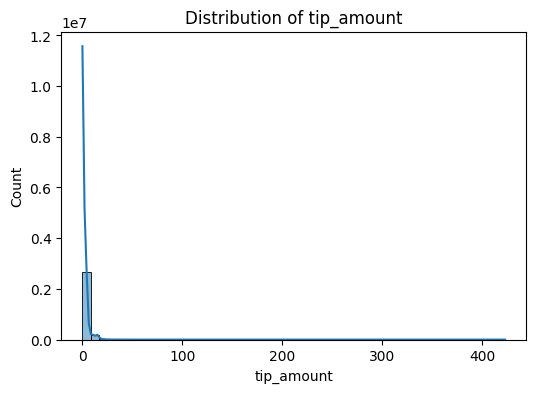

In [26]:
cols = ['trip_distance', 'fare_amount', 'total_amount', 'trip_duration_minutes', 'tip_amount']
for col in cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col], bins=50, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

Observation:-

Numeric columns will show skewness (e.g., fare, duration are usually right-skewed).

## Bivariate analysis

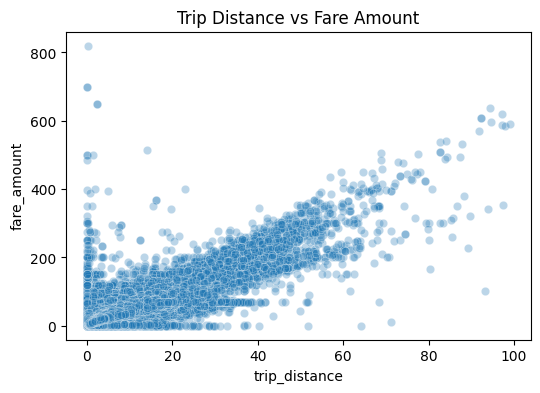

In [27]:
##Trip Distance vs Fare Amount
plt.figure(figsize=(6,4))
sns.scatterplot(x='trip_distance', y='fare_amount', data=data, alpha=0.3)
plt.title("Trip Distance vs Fare Amount")
plt.show()


<Axes: xlabel='trip_duration_minutes', ylabel='total_amount'>

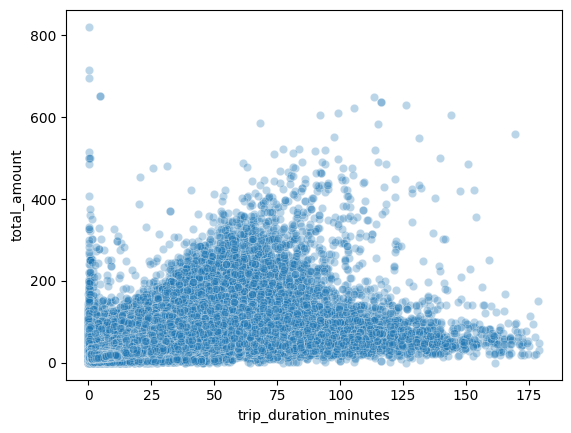

In [28]:
# Trip Duration vs Total Amount
sns.scatterplot(x='trip_duration_minutes', y='total_amount', data=data, alpha=0.3)


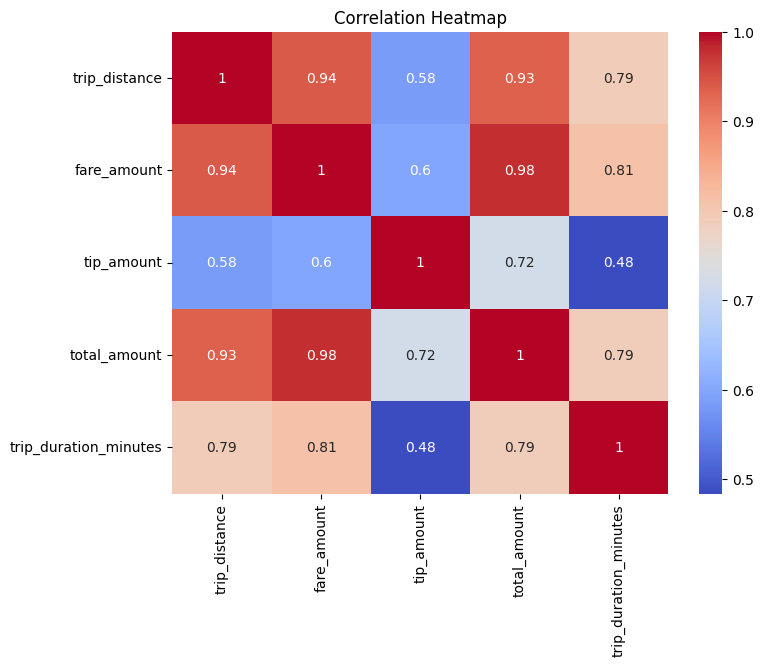

In [29]:
plt.figure(figsize=(8,6))
sns.heatmap(data[['trip_distance','fare_amount','tip_amount','total_amount','trip_duration_minutes']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


<Axes: xlabel='VendorID', ylabel='total_amount'>

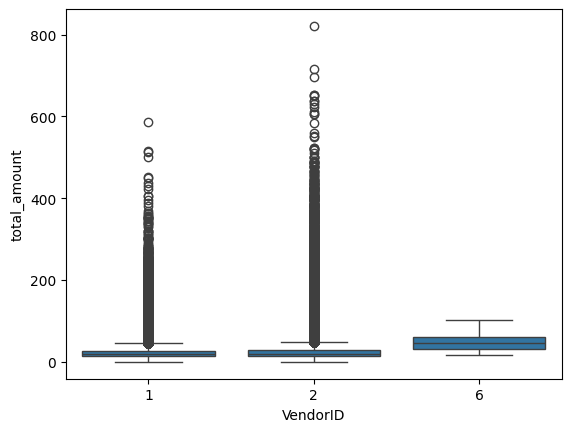

In [30]:
sns.boxplot(x='VendorID', y='total_amount', data=data)


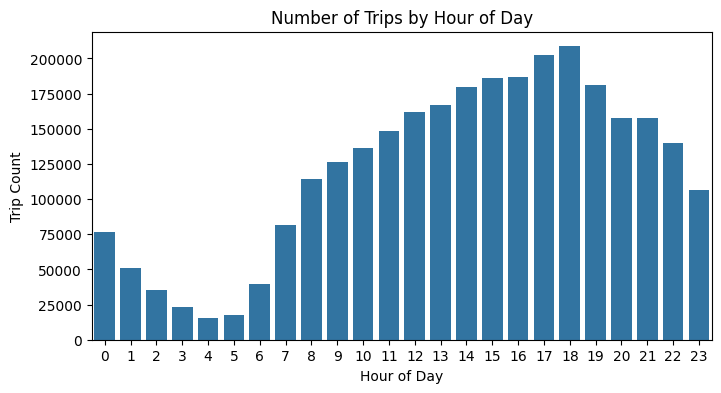

In [31]:
# Time series visulatisation
# 1. Trips by Hour of Day

plt.figure(figsize=(8,4))
sns.countplot(x='pickup_hour', data=data)
plt.title("Number of Trips by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Trip Count")
plt.show()


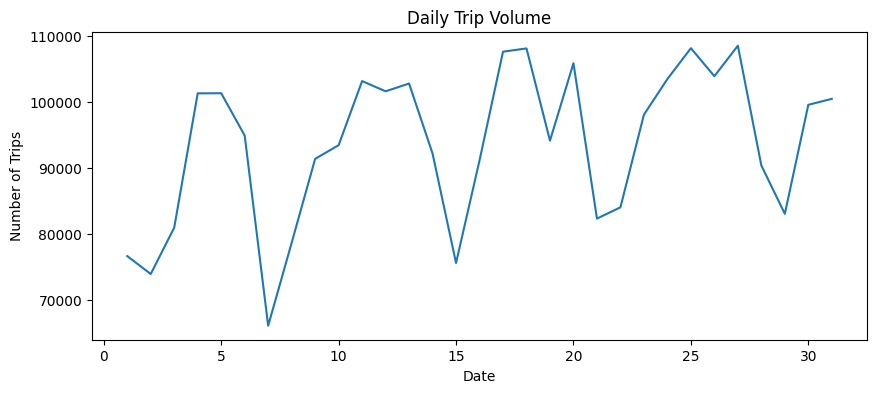

In [32]:
daily_trips = data.groupby('pickup_day').size()
plt.figure(figsize=(10,4))
daily_trips.plot()
plt.title("Daily Trip Volume")
plt.xlabel("Date")
plt.ylabel("Number of Trips")
plt.show()


In [33]:
data.head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,total_amount,congestion_surcharge,Airport_fee,trip_duration_minutes,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second
0,2,1.0,1.72,1.0,N,186,79,2,17.7,1.0,...,22.70,2.5,0.0,19.800000,2024,1,1,0,57,55
1,1,1.0,1.80,1.0,N,140,236,1,10.0,3.5,...,18.75,2.5,0.0,6.600000,2024,1,1,0,3,0
2,1,1.0,4.70,1.0,N,236,79,1,23.3,3.5,...,31.30,2.5,0.0,17.916667,2024,1,1,0,17,6
3,1,1.0,1.40,1.0,N,79,211,1,10.0,3.5,...,17.00,2.5,0.0,8.300000,2024,1,1,0,36,38
4,1,1.0,0.80,1.0,N,211,148,1,7.9,3.5,...,16.10,2.5,0.0,6.100000,2024,1,1,0,46,51


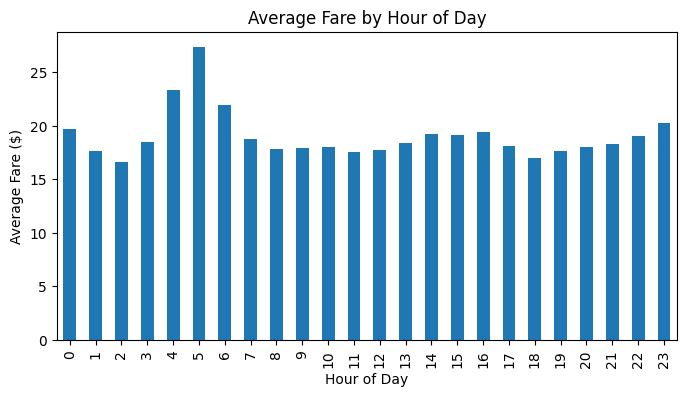

In [34]:
# Average Fare by Hour
avg_fare_hour = data.groupby('pickup_hour')['fare_amount'].mean()
plt.figure(figsize=(8,4))
avg_fare_hour.plot(kind='bar')
plt.title("Average Fare by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Fare ($)")
plt.show()

In [35]:
## Now dropping those columns which donot help in model prediction or model building:-
final_data = data.drop(['VendorID','RatecodeID','store_and_fwd_flag','payment_type','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge','total_amount','congestion_surcharge','Airport_fee','pickup_minute','pickup_second'],axis=1)

In [36]:
final_data.columns

Index(['passenger_count', 'trip_distance', 'PULocationID', 'DOLocationID',
       'fare_amount', 'trip_duration_minutes', 'pickup_year', 'pickup_month',
       'pickup_day', 'pickup_hour'],
      dtype='object')

In [37]:
final_data.head()

,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount,trip_duration_minutes,pickup_year,pickup_month,pickup_day,pickup_hour
0,1.0,1.72,186,79,17.7,19.800000,2024,1,1,0
1,1.0,1.80,140,236,10.0,6.600000,2024,1,1,0
2,1.0,4.70,236,79,23.3,17.916667,2024,1,1,0
3,1.0,1.40,79,211,10.0,8.300000,2024,1,1,0
4,1.0,0.80,211,148,7.9,6.100000,2024,1,1,0


In [38]:
final_data.to_parquet("parepared_data.parquet", index=False)


In [39]:
print("hlw")

hlw
